# Simultaneous model

This workbook explains the difference between between a **simultaneous** model which has to be 
solved with an iterative method and a **recursive** model which just have to be orders and then calculated
equation by equation. 

In [1]:
import matplotlib.pyplot as plt 
import os


from modelclass import model
from modelnet import draw_adjacency_matrix, drawendoexo


## A small model 

In [2]:
fms = '''
FRML xx Y  = C+I+E-M $ 
FRML xx C  = 0.9*Y+Y0 $ 
FRML xx C1 = 0.2*C $
FRML xx C2 = 0.2*C1 $
FRML xx M  = 0.1*Y + 0.2 * c $
FRML xx M1 = 0.2*M $
FRML xx E  = 0.1*E0 $
'''
ms = model(fms,name='A simultaneous model ')   # make a model instance 

This model has simultaneous elements or cyclical elements. The formulars will be evaluated in input sequence


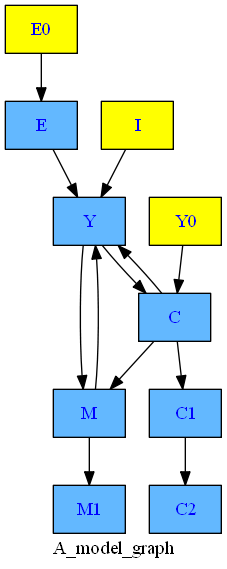

In [3]:
ms.drawmodel()  

## Adjency matrix of dependencies between variables

Another way to display exactly the same as in the figure above

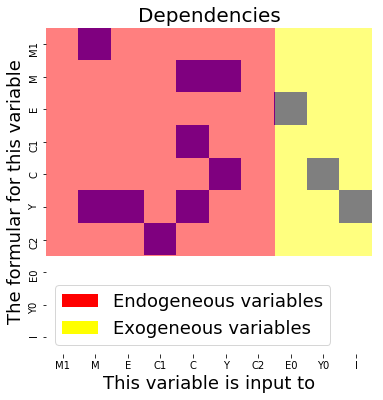

In [4]:
drawendoexo(ms)
plt.show()

## For solving we only care about the endogeneous variables. 

And only contemporaneous endogeneous variables. All exogeneous and lagged endogeneous variables are predetermined when solving

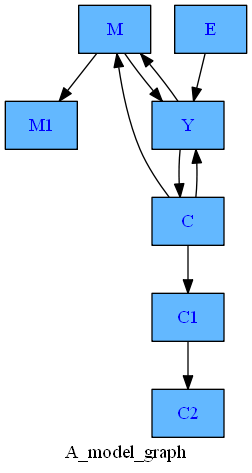

In [5]:
ms.drawendo()

## The adjancy matrix can be sliced

*  **Red** blocks are simultaneous (have feedback) 
*  **Green** blocks are recursive (have no feedback) 

In graph theory, a strong component with several containing several variables is a consists a sumultaneous block, and strong components with only one variables are part of a recursive block.     

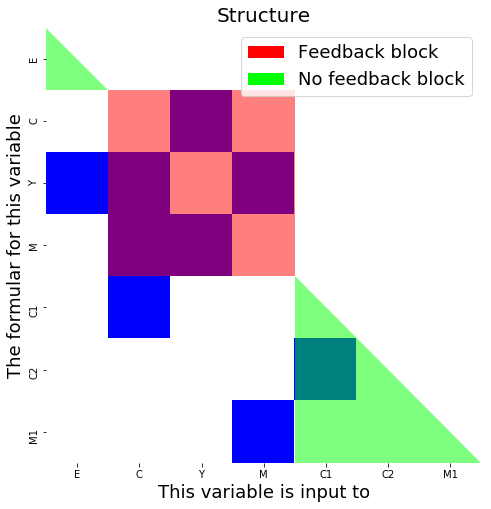

In [6]:
a = draw_adjacency_matrix(ms.endograph,ms.strongorder,ms.strongblock,ms.strongtype,size=(8,8))
plt.show()

## A recursiv model - for comparison, we could solve (calculate) it in excel

In [8]:
fmns = '''
FRML xx Y  = C+I+E-M $ 
FRML xx C  = Y0 $ 
FRML xx C1 = 0.2*C $
FRML xx C2 = 0.2*C1 $
FRML xx M  = 0.2 $
FRML xx M1 = 0.2*M $
FRML xx E  = 0.1*E0 $
'''
mns = model(fmns,name='A simultaneous model ')   # make a model instance 

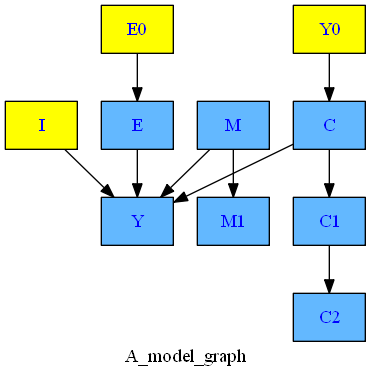

In [9]:
mns.drawmodel()

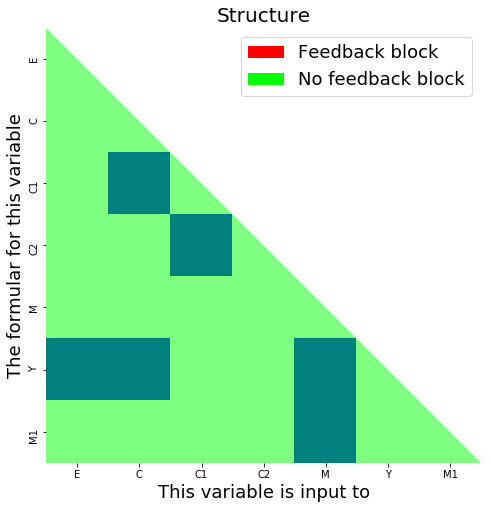

In [10]:
a = draw_adjacency_matrix(mns.endograph,mns.strongorder,mns.strongblock,mns.strongtype,size=(8,8))
plt.show()